In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dotenv
import os
%matplotlib inline

In [2]:
print(dotenv.load_dotenv())
data = pd.read_csv(os.getenv('data_path'))
data.head()

True


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [3]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

## EDA

In [4]:
data.isna().sum().sort_values()

User ID              0
weekday              0
month                0
day                  0
hour                 0
passenger_count      0
pickup_latitude      0
year                 0
pickup_longitude     0
fare_amount          0
key                  0
Traffic Condition    0
Weather              0
Car Condition        0
Driver Name          0
User Name            0
pickup_datetime      0
nyc_dist             5
sol_dist             5
lga_dist             5
dropoff_latitude     5
jfk_dist             5
distance             5
dropoff_longitude    5
ewr_dist             5
bearing              5
dtype: int64

In [5]:
data.drop(['User ID','key'],axis= 1, inplace= True) # features already extracted from them.
data.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [6]:
print(data['Car Condition'].unique())

['Very Good' 'Excellent' 'Bad' 'Good']


In [7]:
condition_map = {
    'Excellent': 3,
    'Very Good': 2,
    'Good': 1,
    'Bad': 0
}
data['Car_Condition_coded'] = data['Car Condition'].map(condition_map)
data['Car_Condition_coded']

0         2
1         3
2         0
3         2
4         0
         ..
499995    0
499996    2
499997    0
499998    1
499999    2
Name: Car_Condition_coded, Length: 500000, dtype: int64

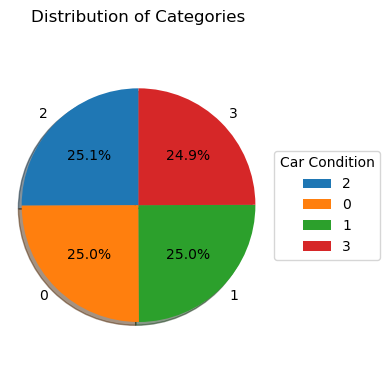

In [8]:
car_value_counts = data['Car_Condition_coded'].value_counts()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(car_value_counts.values, labels=car_value_counts.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Car Condition", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

<Axes: xlabel='fare_amount', ylabel='Weather'>

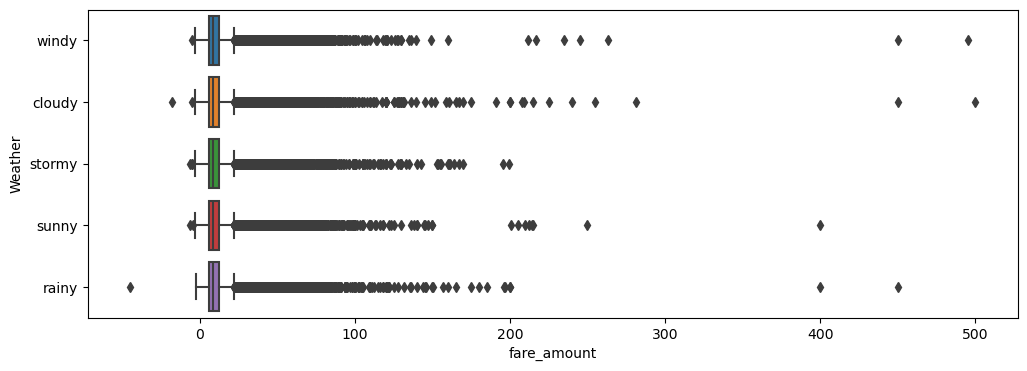

In [9]:
plt.figure(figsize=(12,4))
sns.boxplot(x='fare_amount', data= data, y='Weather')

In [10]:
def set_ticks_(axs, i):
    """
    Set the ticks for the plot.
    """
    yticks = axs[i].get_yticks()
    scaled_yticks = sqrt_scale(yticks)
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels([f'{val:.1f}' for val in scaled_yticks])

In [11]:
def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.05) # modified this because most of the data is only from 0 to 20 in fare amount
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]


In [12]:
def sqrt_scale(y):
    return np.sqrt(y)

In [13]:
def set_title_(axes, i, column):
    axes[i].set_title(column)

In [113]:
def set_labels_(axes, i, label_x, label_y):
    axes[i].set_xlabel(label_x)
    axes[i].set_ylabel(label_y)

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

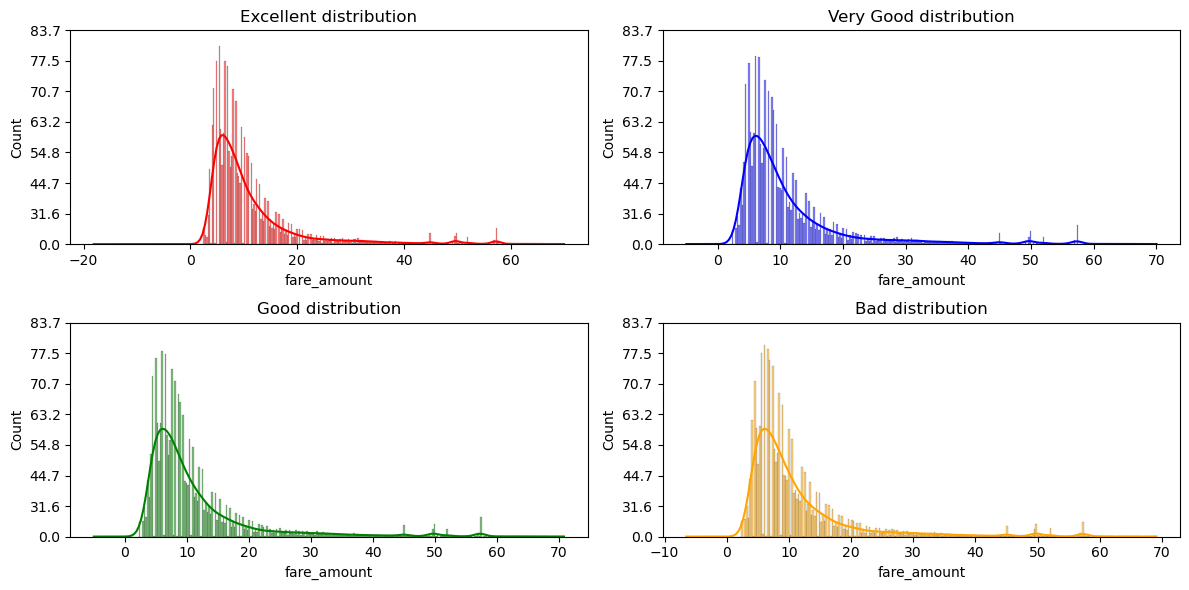

In [14]:
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize=(12, 6))
ax = ax.flatten()
colors =['red','blue','green','orange']
titles = ['Excellent distribution', 'Very Good distribution', 'Good distribution', 'Bad distribution']

for i, title in enumerate(titles):
    sns.histplot(drop_outliers_iqr(data[data['Car_Condition_coded'] == i],'fare_amount'),ax= ax[i],kde= True,color= colors[i])
    set_ticks_(i=i, axs= ax)
    set_title_(i=i, axes= ax, column= title)

plt.tight_layout()
plt.show()

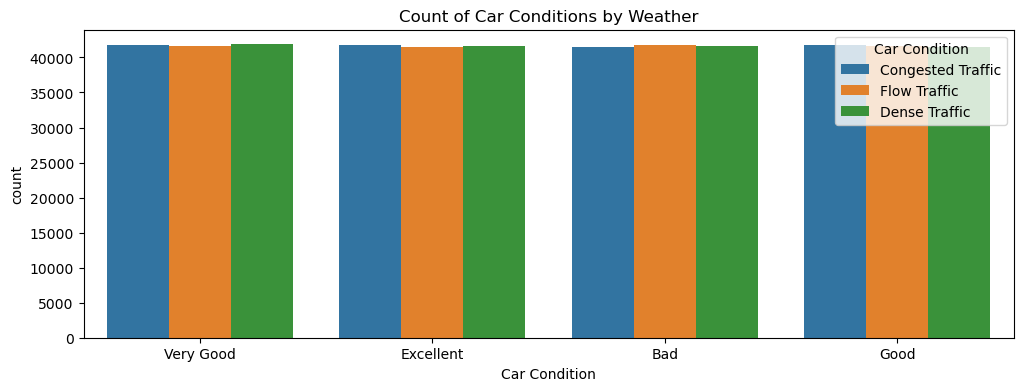

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(
    data= data,
    x= 'Car Condition',
    hue='Traffic Condition'
)

plt.title('Count of Car Conditions by Weather')
plt.legend(title='Car Condition', loc='upper right')


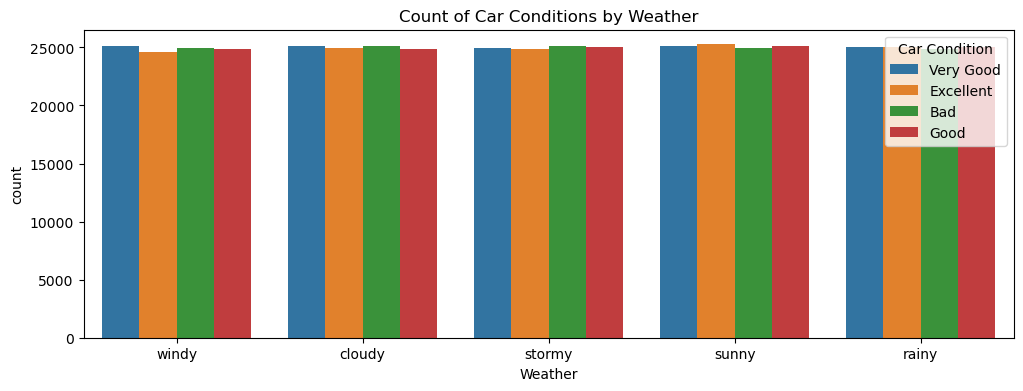

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(
    data= data,
    x= 'Weather',
    hue='Car Condition'
)

plt.title('Count of Car Conditions by Weather')
plt.legend(title='Car Condition', loc='upper right')


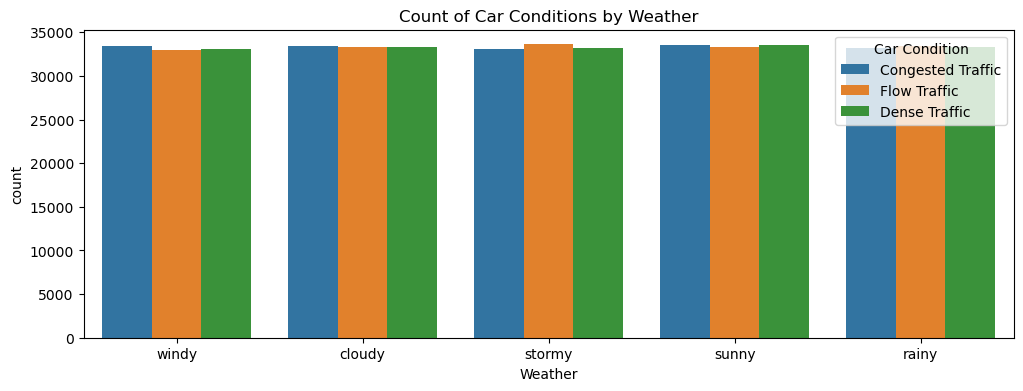

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(
    data= data,
    x= 'Weather',
    hue='Traffic Condition'
)

plt.title('Count of Car Conditions by Weather')
plt.legend(title='Car Condition', loc='upper right')


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

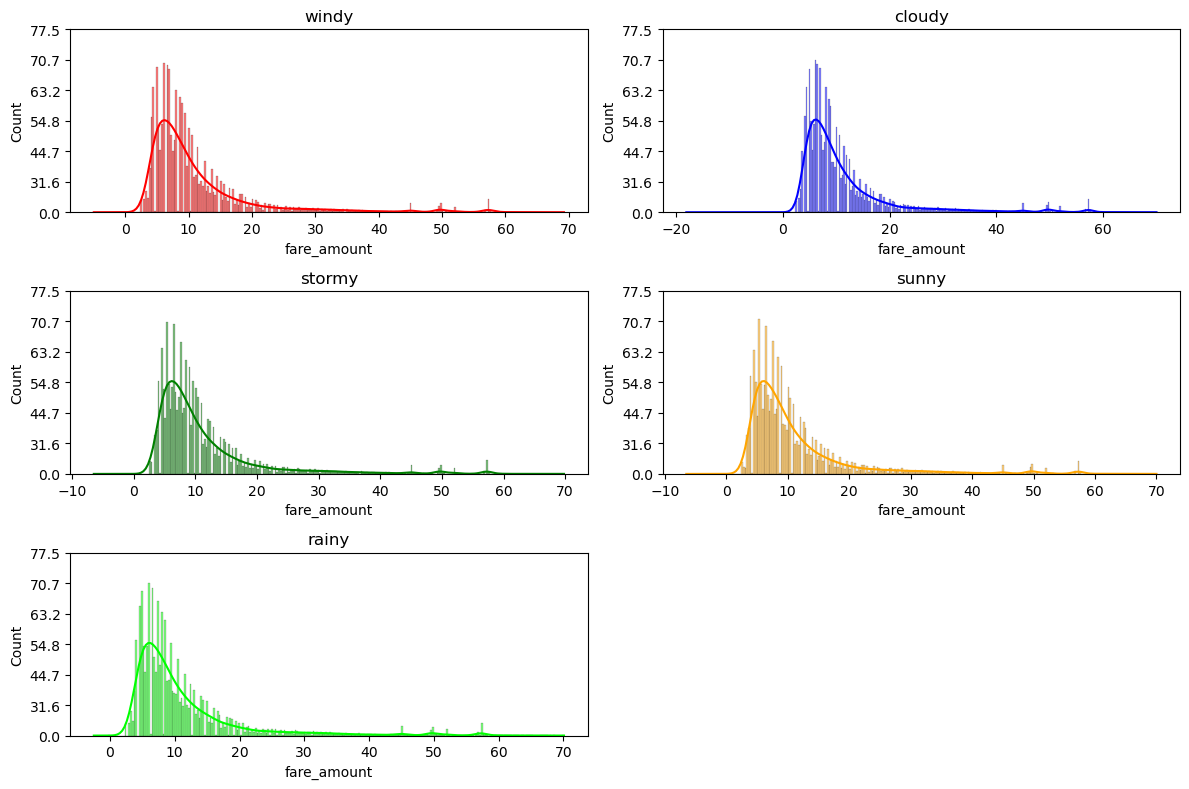

In [18]:
fig, axs = plt.subplots(nrows= 3, ncols= 2, figsize=(12, 8))
axs = axs.flatten()
colors = ['red','blue','green','orange','lime']
weather_cond = data['Weather'].unique()
for i, ax in enumerate(axs):
    if i < 5:
        sns.histplot(drop_outliers_iqr(data[data['Weather'] == weather_cond[i]],'fare_amount'),ax= axs[i],kde= True,color= colors[i])
        set_ticks_(i=i, axs= axs)
        set_title_(i=i, axes= axs, column= weather_cond[i])
    else:
        ax.axis('off')  # Turn off the unused subplot
    
plt.tight_layout()
plt.show()

right skewed -> take the sqrt

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


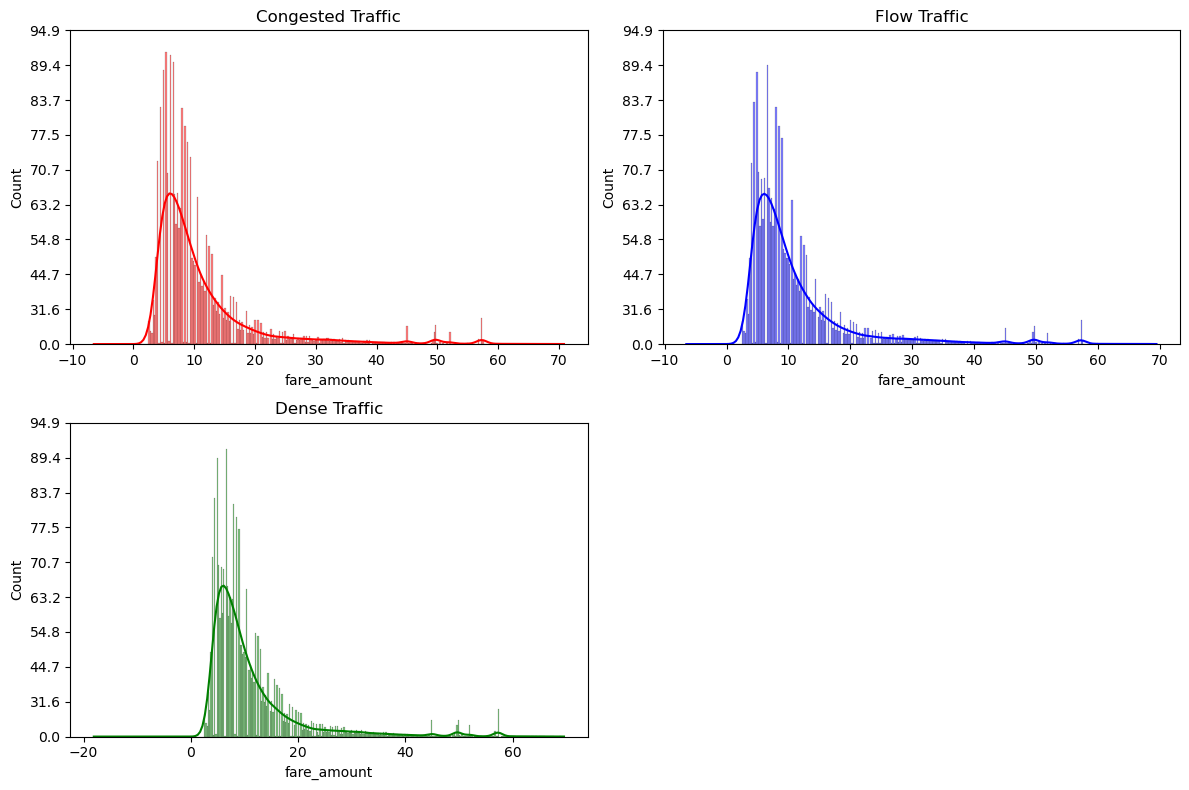

In [19]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(12, 8))
axs = axs.flatten()
colors = ['red','blue','green']
traffic_cond = data['Traffic Condition'].unique()
for i, ax in enumerate(axs):
    if i < 3:
        sns.histplot(drop_outliers_iqr(data[data['Traffic Condition'] == traffic_cond[i]],'fare_amount'),ax= axs[i],kde= True,color= colors[i])
        set_ticks_(i=i, axs= axs)
        set_title_(i=i, axes= axs, column= traffic_cond[i])
    else:
        ax.axis('off')  # Turn off the unused subplot
    
plt.tight_layout()
plt.show()

Dense traffic has more negative values than the rest in dense traffic which indicates cutomer's anger or so.

In [20]:
data.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'Car_Condition_coded'],
      dtype='object')

### Top Drivers

In [21]:
top_drivers = data.groupby('Driver Name').agg(
    {
        'User Name': 'count',
        'fare_amount': 'mean'
    }
).reset_index().rename(columns={'User Name': 'count',
                            'fare_amount': 'mean of rides'}
                       )
top_drivers

,Driver Name,count,mean of rides
0,Aaron Acosta,1,4.900000
1,Aaron Adams,6,9.283333
2,Aaron Aguilar,1,8.500000
3,Aaron Aguirre,1,4.100000
4,Aaron Allen,6,14.216667
...,...,...,...
221695,Zoe Wilkinson,1,5.500000
221696,Zoe Wilson,1,6.000000
221697,Zoe Woodard,1,12.900000
221698,Zoe Wright,1,9.700000


In [22]:
top_drivers_trips = top_drivers.nlargest(10,'count')
top_drivers_fare = top_drivers.nlargest(10,'mean of rides')

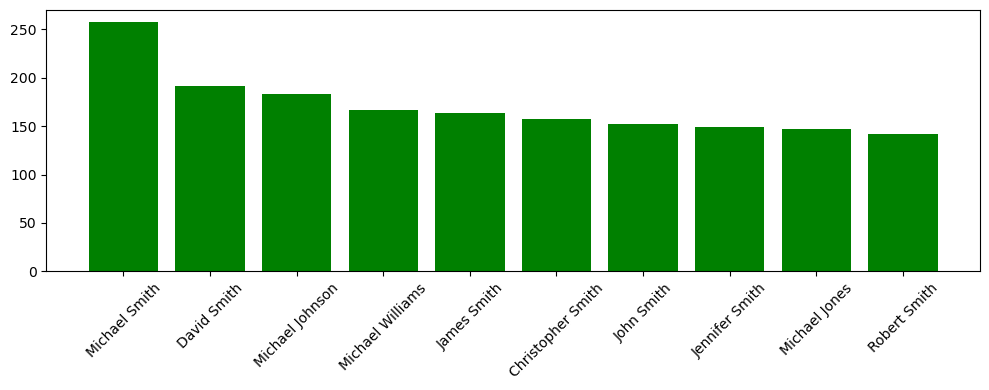

In [23]:
plt.figure(figsize=(10,4))
plt.bar(top_drivers_trips['Driver Name'], top_drivers_trips['count'], color='green')
plt.xticks(rotation= 45)
plt.tight_layout()

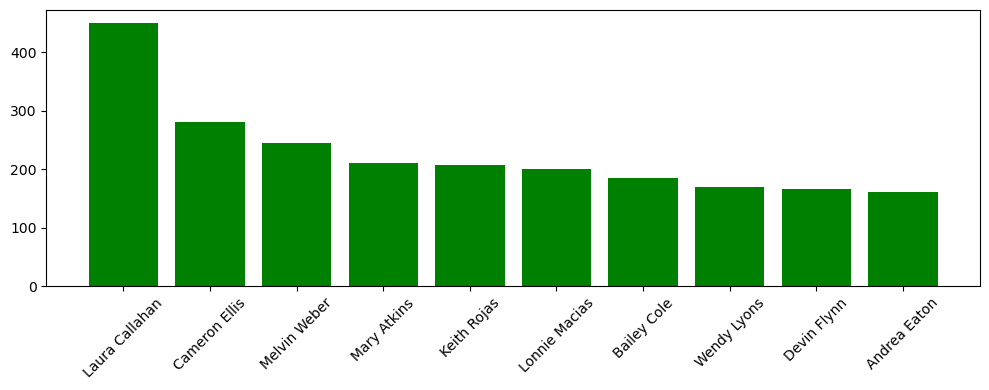

In [24]:
plt.figure(figsize=(10,4))
plt.bar(top_drivers_fare['Driver Name'], top_drivers_fare['mean of rides'], color='green')
plt.xticks(rotation= 45)
plt.tight_layout()

None of top 10 drivers rides are in in top 10 average fare.

In [25]:
top_drivers_fare = top_drivers.sort_values(by= 'mean of rides', ascending= False).reset_index().drop(['index'], axis= 1)
top_drivers_fare

,Driver Name,count,mean of rides
0,Laura Callahan,1,450.00
1,Cameron Ellis,1,281.05
2,Melvin Weber,1,245.41
3,Mary Atkins,1,211.44
4,Keith Rojas,1,208.00
...,...,...,...
221695,Aimee Duran,1,-3.00
221696,Kristin Roberts,4,-3.05
221697,Theresa Hogan,1,-5.00
221698,Scott Watkins,2,-6.20


In [26]:
top_drivers_fare = top_drivers_fare[top_drivers_fare['count'] > 10].reset_index().drop(['index'],axis= 1)
top_drivers_fare = pd.merge(top_drivers_fare,
                                data[['Driver Name', 'distance', 'Car Condition', 'Weather', 'Traffic Condition']],
                                    on= 'Driver Name', how= 'left')
top_drivers_fare

,Driver Name,count,mean of rides,distance,Car Condition,Weather,Traffic Condition
0,Deborah Lopez,11,55.036364,4.144149,Very Good,stormy,Flow Traffic
1,Deborah Lopez,11,55.036364,0.000000,Excellent,cloudy,Dense Traffic
2,Deborah Lopez,11,55.036364,1.428505,Good,sunny,Congested Traffic
3,Deborah Lopez,11,55.036364,1.972308,Very Good,windy,Flow Traffic
4,Deborah Lopez,11,55.036364,1.915948,Good,cloudy,Congested Traffic
...,...,...,...,...,...,...,...
99416,Aaron Torres,11,5.727273,1.396948,Excellent,rainy,Congested Traffic
99417,Aaron Torres,11,5.727273,1.122109,Very Good,sunny,Flow Traffic
99418,Aaron Torres,11,5.727273,2.927611,Bad,rainy,Congested Traffic
99419,Aaron Torres,11,5.727273,0.622238,Excellent,rainy,Dense Traffic


In [27]:
unique_drivers = top_drivers_fare.drop_duplicates(subset=['Driver Name']).head(11)['Driver Name'].tolist()
unique_drivers.remove('Brittany Anderson')

In [28]:
filtered_data = top_drivers_fare[top_drivers_fare['Driver Name'].isin(unique_drivers)]

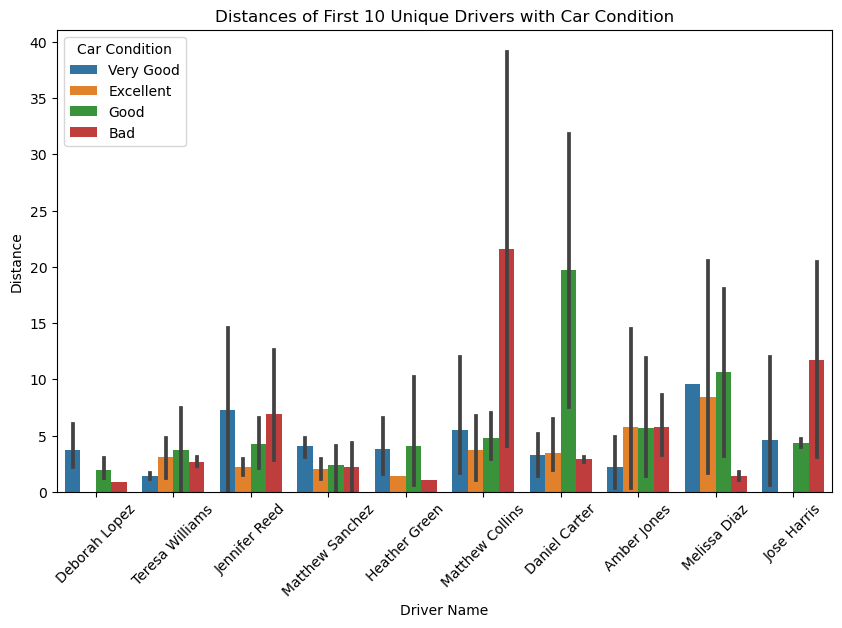

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Driver Name', y='distance', hue='Car Condition', data=filtered_data)
plt.xlabel('Driver Name')
plt.ylabel('Distance')
plt.title('Distances of First 10 Unique Drivers with Car Condition')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Car Condition')
plt.show()

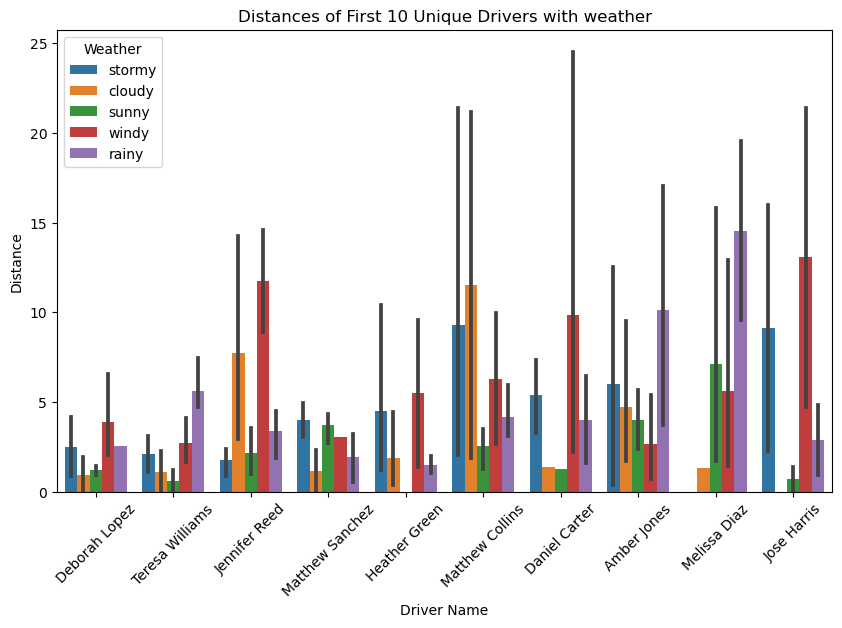

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Driver Name', y='distance', hue='Weather', data=filtered_data)
plt.xlabel('Driver Name')
plt.ylabel('Distance')
plt.title('Distances of First 10 Unique Drivers with weather')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Weather')
plt.show()

In [31]:
car_dist = data.groupby('Car Condition').agg({
        'distance' : 'sum'
    }).reset_index()
car_dist['sum'] = car_dist['distance'].apply(np.sqrt)
car_dist.drop(['distance'],axis= 1,inplace= True)
car_dist

,Car Condition,sum
0,Bad,1577.669980
1,Excellent,1549.944939
2,Good,1513.085373
3,Very Good,1597.964667


In [32]:
weather_dist = data.groupby('Weather').agg({
        'distance' : 'sum'
    }).reset_index()
weather_dist['sum'] = weather_dist['distance'].apply(np.sqrt)
weather_dist.drop(['distance'],axis= 1,inplace= True)
weather_dist.sort_values(by= 'sum', ascending= False, inplace= True)
weather_dist

,Weather,sum
3,sunny,1448.561370
0,cloudy,1434.440831
2,stormy,1397.876113
1,rainy,1386.700500
4,windy,1304.355725


<BarContainer object of 5 artists>

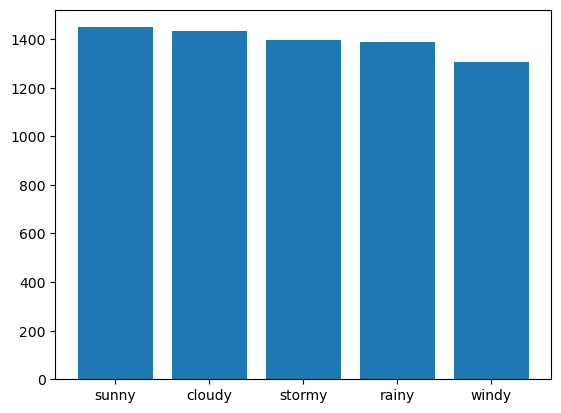

In [33]:
plt.bar(weather_dist['Weather'], weather_dist['sum'])

### Distances.

In [34]:
data.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'Car_Condition_coded'],
      dtype='object')

In [35]:
airports_dist = data[['jfk_dist','ewr_dist','lga_dist','sol_dist','nyc_dist']]
airports_dist

,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist
0,20.265840,55.176046,14.342611,34.543548,27.572573
1,44.667679,31.832358,23.130775,15.125872,8.755732
2,43.597686,33.712082,19.865289,17.722624,9.847344
3,42.642965,32.556289,21.063132,15.738963,7.703421
4,43.329953,39.406828,15.219339,23.732406,15.600745
...,...,...,...,...,...
499995,42.565403,36.580043,17.157511,20.401068,12.280187
499996,41.814877,27.833416,26.463167,8.596656,0.994796
499997,31.780108,38.960930,19.708214,19.066488,11.663395
499998,42.292914,36.382813,17.227166,20.006433,11.819775


In [36]:
plt.figure(figsize=(10, 4))
matrix = airports_dist.corr()
matrix

,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist
jfk_dist,1.000000,0.999994,0.999996,0.999994,0.999994
ewr_dist,0.999994,1.000000,0.999994,1.000000,1.000000
lga_dist,0.999996,0.999994,1.000000,0.999993,0.999994
sol_dist,0.999994,1.000000,0.999993,1.000000,1.000000
nyc_dist,0.999994,1.000000,0.999994,1.000000,1.000000


<Figure size 1000x400 with 0 Axes>

Decision here: (for airports distances)
<ul>
    <li>Drop the features.</li>
    <li>Perform PCA.</li>
    <li>Perform Regularization.</li>
</ul>

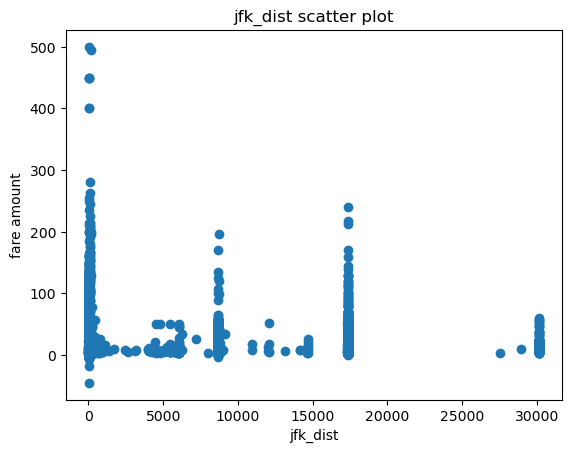

In [37]:
plt.scatter(airports_dist[airports_dist.columns[i]], data['fare_amount'])
plt.title(airports_dist.columns[0] + ' scatter plot')
plt.xlabel(airports_dist.columns[0])
plt.ylabel('fare amount')
plt.show()    

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Bearing distribution')

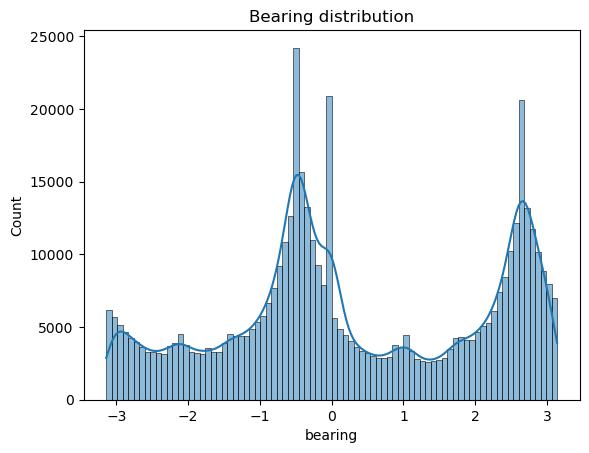

In [38]:
sns.histplot(data= data, x= 'bearing', kde= True)
plt.title('Bearing distribution')

In [39]:
mat = data[['bearing','distance','fare_amount']].corr()
mat

,bearing,distance,fare_amount
bearing,1.000000,-0.017451,-0.024303
distance,-0.017451,1.000000,0.026486
fare_amount,-0.024303,0.026486,1.000000


In [40]:
from sklearn.cluster import KMeans
data_nona = data.dropna()
coordinates = data_nona[['pickup_longitude','pickup_latitude']]
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust `n_clusters` as needed
kmeans.fit(coordinates)
data_nona['cluster'] = kmeans.labels_


d:\AnaConda\Here\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\2175994763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nona['cluster'] = kmeans.labels_


In [41]:
cluster_counts = data_nona['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

print(cluster_counts)

   cluster   count
0        0  490227
1        1    9765
2        3       1
3        4       1
4        2       1


In [42]:
coordinates = data_nona[['pickup_longitude','pickup_latitude']]
kmeans = KMeans(n_clusters=2, random_state=0)  # Adjust `n_clusters` as needed
kmeans.fit(coordinates)
data_nona['cluster'] = kmeans.labels_

d:\AnaConda\Here\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\3268577024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nona['cluster'] = kmeans.labels_


In [43]:
cluster_counts = data_nona['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

print(cluster_counts)

   cluster   count
0        0  490228
1        1    9767


In [44]:
# Now you can group by cluster and analyze the fare_amount and distance
clustered_summary = data_nona.groupby('cluster').agg({
    'fare_amount': ['mean', 'std'],
    'distance': ['mean', 'std'],
    'User Name': 'count',  # Count of trips in each cluster
    'jfk_dist': ['mean','std'],
    'bearing':'std'
    
}).reset_index().drop(['cluster'],axis=1) # index is the cluster
clustered_summary

C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\2023240084.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  }).reset_index().drop(['cluster'],axis=1) # index is the cluster


fare_amount               distance              User Name      jfk_dist  \
         mean        std        mean          std     count          mean   
0   11.347363   9.867218   11.853733   265.634413    490228     50.484080   
1   11.901234  12.105789  401.685131  1793.313201      9767  17189.418208   

                 bearing  
           std       std  
0   267.756017  1.821236  
1  2823.679057  0.399647

In [45]:
data_nona['distance'] = data_nona['distance'].apply(np.sqrt)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\1005086262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nona['distance'] = data_nona['distance'].apply(np.sqrt)


We can see clearly that the customers are mainly two cluster.<br>
One cluster is somehow away from all airports -> maybe that's why they cut longer distances.

In [46]:
data_nona_0 = data_nona[data_nona['cluster'] == 0]
data_nona_1 = data_nona[data_nona['cluster'] == 1]

In [47]:
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust `n_clusters` as needed
kmeans.fit(data_nona_0[['dropoff_longitude', 'dropoff_latitude']])
data_nona_0['cluster_drop'] = kmeans.labels_
print(data_nona_0.groupby('cluster_drop')['User Name'].agg('count').reset_index())

d:\AnaConda\Here\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   cluster_drop  User Name
0             0     489748
1             1          1
2             2        479


C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\4159965801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nona_0['cluster_drop'] = kmeans.labels_


In [48]:
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust `n_clusters` as needed
kmeans.fit(data_nona_1[['dropoff_longitude', 'dropoff_latitude']])
data_nona_1['cluster_drop'] = kmeans.labels_
print(data_nona_1.groupby('cluster_drop')['User Name'].agg('count').reset_index())

   cluster_drop  User Name
0             0       9304
1             1        462
2             2          1


d:\AnaConda\Here\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\1554370744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nona_1['cluster_drop'] = kmeans.labels_


In [49]:
# Now you can group by cluster and analyze the fare_amount and distance
clustered_summary_2 = data_nona_0.groupby('cluster_drop').agg({
    'fare_amount': ['mean', 'std'],
    'distance': ['mean', 'std'],
    'User Name': 'count',  # Count of trips in each cluster
    'jfk_dist': ['mean','std'],
    'bearing':'std'
    
}).reset_index().drop(['cluster_drop'],axis=1) # index is the cluster
clustered_summary_2

C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\1134884396.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  }).reset_index().drop(['cluster_drop'],axis=1) # index is the cluster


fare_amount               distance           User Name      jfk_dist  \
         mean        std        mean       std     count          mean   
0   11.342327   9.846243    1.648907  0.978331    489748     42.292159   
1    4.100000        NaN  111.355092       NaN         1  27503.603940   
2   16.511315  22.238722   91.210161  5.287709       479   8368.906050   

                bearing  
          std       std  
0   40.996793  1.821049  
1         NaN       NaN  
2  904.839668  0.194709

In [50]:
# Now you can group by cluster and analyze the fare_amount and distance
clustered_summary_3 = data_nona_1.groupby('cluster_drop').agg({
    'fare_amount': ['mean', 'std'],
    'distance': ['mean', 'std'],
    'User Name': 'count',  # Count of trips in each cluster
    'jfk_dist': ['mean','std'],
    'bearing':'std'
    
}).reset_index().drop(['cluster_drop'],axis=1) # index is the cluster
print(clustered_summary_3)

  fare_amount              distance           User Name      jfk_dist  \
         mean        std       mean       std     count          mean   
0   11.774987  12.038144   0.125854  2.338081      9304  17625.474884   
1   14.448420  13.164720  91.375971  5.075306       462   8382.532226   
2    9.700000        NaN  53.666096       NaN         1  28899.430976   

                 bearing  
           std       std  
0  2068.171260  0.355964  
1   851.641693  0.099782  
2          NaN       NaN  


C:\Users\Acer\AppData\Local\Temp\ipykernel_16780\153616074.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  }).reset_index().drop(['cluster_drop'],axis=1) # index is the cluster


Cluster 0 is the cluster close to all airports:<br>
within this cluster, there are who have drop off away from jfk than the others that's why they cut higher distaces.<br>
Cluster 1 is the cluster away from all airports:<br>
within this cluster, there are who have drop off near to jfk than the others that's why they cut smaller distaces.

In [51]:
data.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'Car_Condition_coded'],
      dtype='object')

In [77]:
trips_per_year = data.groupby('year').agg({
        'year' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_year.columns = ['year','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']

trips_per_year

,year,number_of_trips,fare_amount_mean,fare_amount_std,passenger_count_mean,passenger_count_std,distance_mean,distance_std,jfk_dist_mean,jfk_dist_std
0,2009,77002,10.018505,8.176336,1.685593,1.249990,6.191695,160.667634,268.322093,1955.515911
1,2010,75791,10.197785,8.439440,1.671650,1.242954,7.195368,182.693586,398.530736,2446.551870
2,2011,79529,10.481498,9.156279,1.654554,1.262034,17.903723,344.430314,432.522116,2540.597180
3,2012,80225,11.157711,9.841385,1.684699,1.335141,25.964616,418.842627,432.034183,2522.662589
4,2013,78034,12.626578,10.797816,1.712369,1.379392,16.794015,338.687852,414.264399,2718.088635
5,2014,74608,12.965165,11.193553,1.692218,1.352619,34.484834,518.182200,389.028080,2367.267717
6,2015,34811,13.027985,12.009427,1.683606,1.339297,37.978245,546.250738,326.454588,2129.262015


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


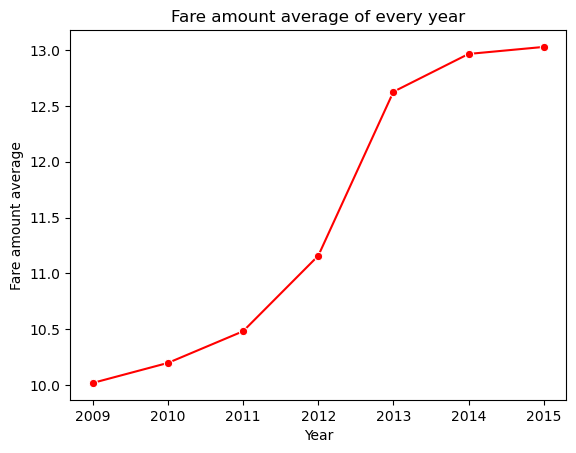

In [75]:
sns.lineplot(x= trips_per_year['year'], y= trips_per_year['fare_amount_mean'], marker='o', color='r')
plt.title('Fare amount average of every year')
plt.xlabel('Year')
plt.ylabel('Fare amount average')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


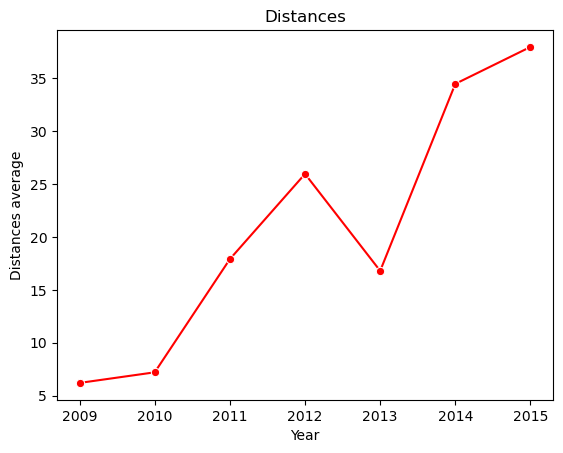

In [76]:
sns.lineplot(x= trips_per_year['year'], y= trips_per_year['distance_mean'], marker='o', color='r')
plt.title('Distances')
plt.xlabel('Year')
plt.ylabel('Distances average')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


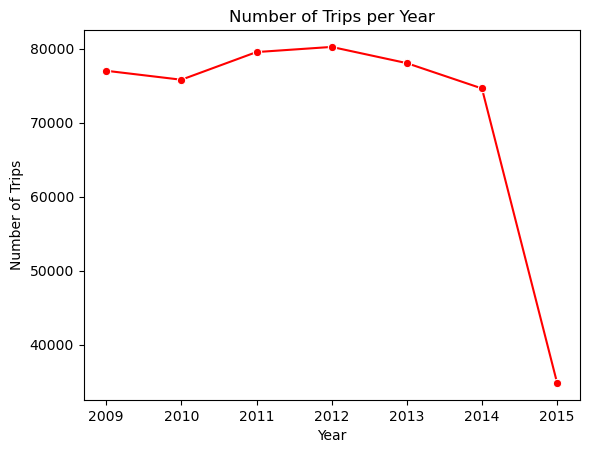

In [78]:
sns.lineplot(data= trips_per_year, x= 'year', y= 'number_of_trips', marker='o', color='r')
plt.title('Number of Trips per Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.show()

In [79]:
trips_per_month = data.groupby('month').agg({
        'month' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_month.columns = ['month','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']

trips_per_month

,month,number_of_trips,fare_amount_mean,fare_amount_std,passenger_count_mean,passenger_count_std,distance_mean,distance_std,jfk_dist_mean,jfk_dist_std
0,1,44547,10.792074,9.391208,1.684850,1.310884,15.087962,317.384729,346.492937,2248.273113
1,2,42454,10.882676,9.313493,1.662388,1.296448,20.529798,381.436851,383.692875,2371.143860
2,3,46715,11.158100,9.925334,1.666831,1.300279,19.246675,363.874690,372.798291,2336.878120
3,4,45959,11.270379,9.514545,1.676211,1.306825,20.060011,372.889343,370.915591,2327.146438
4,5,46733,11.677835,10.537665,1.686517,1.303176,21.416911,386.601744,514.311894,3122.075521
5,6,44827,11.545656,9.925150,1.685792,1.312683,19.782397,365.576725,375.907561,2352.663193
6,7,38127,11.154873,9.741806,1.695885,1.309467,19.827389,370.389401,412.830437,2476.673633
7,8,35871,11.206067,9.692578,1.692565,1.306304,23.758530,415.659910,409.890273,2456.661789
8,9,37980,11.819406,10.608015,1.694365,1.319377,22.450612,402.072555,359.743760,2283.294901
9,10,40551,11.666560,10.432002,1.675914,1.297564,18.547913,358.406202,328.316897,2172.735521


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


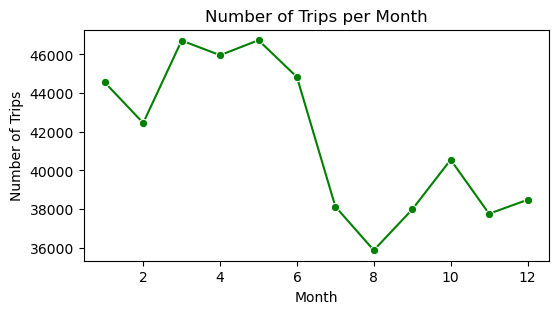

In [87]:
plt.figure(figsize=(6,3))
sns.lineplot(data= trips_per_month, x= 'month', y= 'number_of_trips', marker='o', color='g')
plt.title('Number of Trips per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


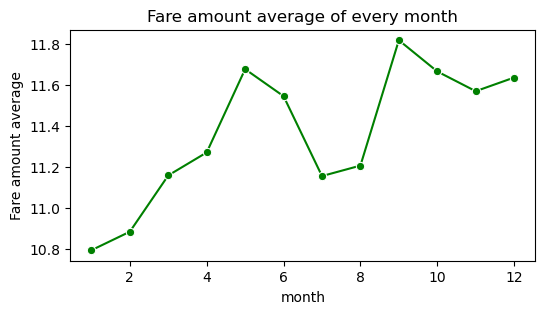

In [88]:
plt.figure(figsize=(6,3))
sns.lineplot(x= trips_per_month['month'], y= trips_per_month['fare_amount_mean'], marker='o', color='g')
plt.title('Fare amount average of every month')
plt.xlabel('month')
plt.ylabel('Fare amount average')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


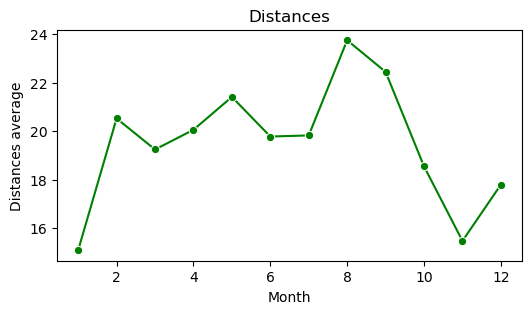

In [89]:
plt.figure(figsize=(6,3))
sns.lineplot(x= trips_per_month['month'], y= trips_per_month['distance_mean'], marker='o', color='g')
plt.title('Distances')
plt.xlabel('Month')
plt.ylabel('Distances average')
plt.show()

Trips are more in the fall season, less in the rest and very low in spring and winter. However, the fare amounts are somehow higher, which indicates that during time where number of trips are down, the captains tend to increase the fare.

In [93]:
trips_per_day = data.groupby('day').agg({
        'day' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_day.columns = ['day','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']

trips_per_day

,day,number_of_trips,fare_amount_mean,fare_amount_std,passenger_count_mean,passenger_count_std,distance_mean,distance_std,jfk_dist_mean,jfk_dist_std
0,1,15573,11.373487,9.985744,1.677005,1.301645,21.160619,389.370382,353.833642,2265.046076
1,2,15713,11.370785,9.683693,1.679947,1.308981,25.724065,431.192590,385.935461,2369.885461
2,3,15863,11.271819,9.673723,1.678056,1.293633,19.551644,361.179776,384.217317,2373.458112
3,4,15767,11.247535,9.633247,1.682248,1.311404,22.312537,399.768019,372.401298,2328.039640
4,5,16045,11.300751,10.016764,1.689623,1.302059,14.200059,303.765673,374.327235,2351.086974
5,6,16451,11.442294,10.094924,1.663668,1.289473,13.717328,297.948532,349.676282,2262.884611
6,7,16642,11.342685,9.779744,1.665845,1.293500,17.455074,343.410095,373.434489,2340.421496
7,8,16807,11.201462,10.038235,1.674957,1.298286,19.895913,374.267015,377.478439,2351.250025
8,9,16963,11.155014,9.378794,1.662854,1.289963,19.095870,359.429881,370.205212,2326.483444
9,10,16763,11.389937,9.853088,1.684543,1.307871,17.387264,341.626746,367.769134,2321.558189


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


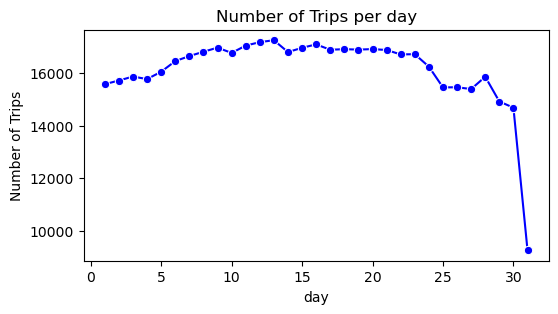

In [94]:
plt.figure(figsize=(6,3))
sns.lineplot(data= trips_per_day, x= 'day', y= 'number_of_trips', marker='o', color='b')
plt.title('Number of Trips per day')
plt.xlabel('day')
plt.ylabel('Number of Trips')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


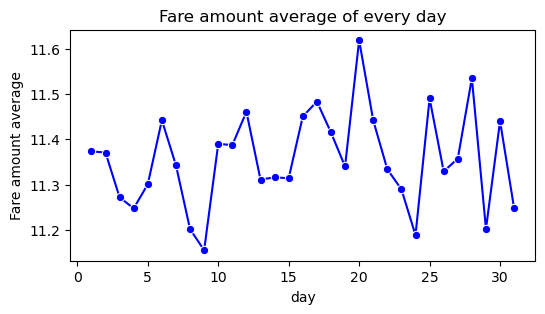

In [97]:
plt.figure(figsize=(6,3))
sns.lineplot(x= trips_per_day['day'], y= trips_per_day['fare_amount_mean'], marker='o', color='b')
plt.title('Fare amount average of every day')
plt.xlabel('day')
plt.ylabel('Fare amount average')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


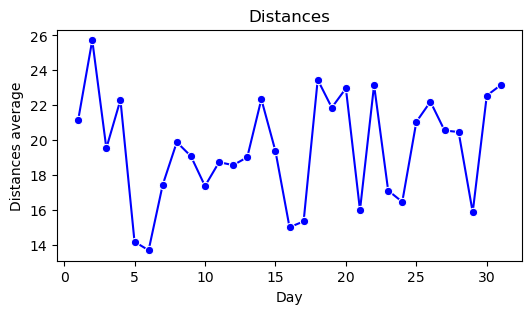

In [99]:
plt.figure(figsize=(6,3))
sns.lineplot(x= trips_per_day['day'], y= trips_per_day['distance_mean'], marker='o', color='b')
plt.title('Distances')
plt.xlabel('Day')
plt.ylabel('Distances average')
plt.show()

No effect by the day on the number of trips or distance, or fare amounts

In [100]:
trips_per_hour = data.groupby('hour').agg({
        'hour' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_hour.columns = ['hour','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']

trips_per_hour

,hour,number_of_trips,fare_amount_mean,fare_amount_std,passenger_count_mean,passenger_count_std,distance_mean,distance_std,jfk_dist_mean,jfk_dist_std
0,0,19650,11.774804,9.424157,1.744326,1.310696,25.009558,423.394247,424.228939,2566.222712
1,1,14556,11.438250,8.787547,1.743405,1.307396,15.515779,317.882655,421.754780,2575.220475
2,2,10884,11.511949,9.162187,1.733921,1.293309,18.173196,346.116565,417.523146,2515.130561
3,3,7936,12.076379,10.192270,1.768901,1.338404,21.091953,382.619707,432.207749,2576.443750
4,4,5864,13.687069,11.723675,1.714700,1.325030,38.850043,538.364386,441.866501,2554.746586
5,5,4982,15.166068,15.442092,1.606784,1.306224,19.049514,346.839763,442.899342,2637.611321
6,6,10326,12.314031,12.669265,1.522080,1.241044,16.930849,323.521276,371.988713,2381.002341
7,7,18231,10.952701,9.737444,1.559322,1.278790,22.051665,396.148300,390.533595,2432.725084
8,8,22599,10.913638,9.540923,1.579406,1.276515,18.482218,363.920436,377.383188,2396.121861
9,9,23566,10.818004,9.333114,1.613469,1.320232,18.500844,355.320217,353.919480,2301.617777


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


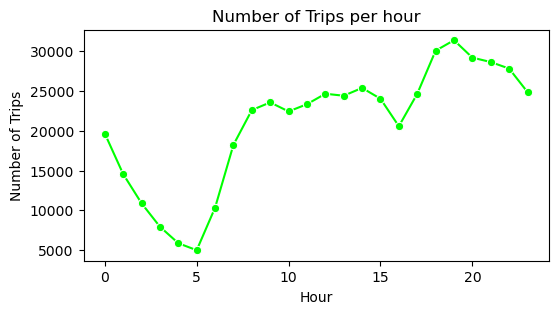

In [101]:
plt.figure(figsize=(6,3))
sns.lineplot(data= trips_per_hour, x= 'hour', y= 'number_of_trips', marker='o', color='lime')
plt.title('Number of Trips per hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


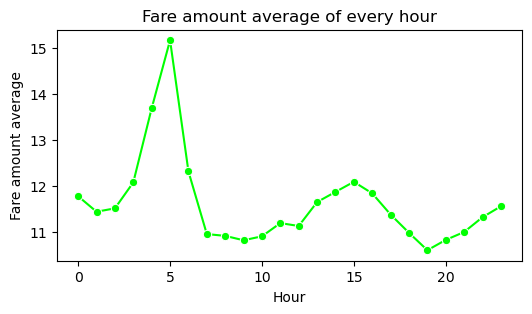

In [102]:
plt.figure(figsize=(6,3))
sns.lineplot(x= trips_per_hour['hour'], y= trips_per_hour['fare_amount_mean'], marker='o', color='lime')
plt.title('Fare amount average of every hour')
plt.xlabel('Hour')
plt.ylabel('Fare amount average')
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


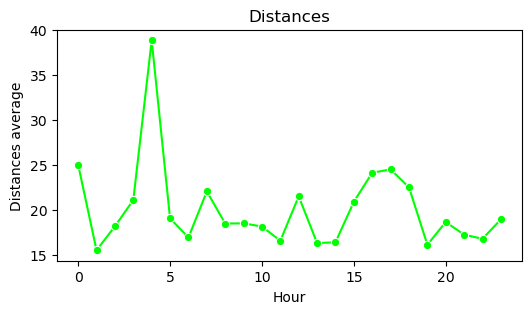

In [104]:
plt.figure(figsize=(6,3))
sns.lineplot(x= trips_per_hour['hour'], y= trips_per_hour['distance_mean'], marker='o', color='lime')
plt.title('Distances')
plt.xlabel('Hour')
plt.ylabel('Distances average')
plt.show()

In [106]:
print(data[['distance','fare_amount']].corr())

             distance  fare_amount
distance     1.000000     0.026486
fare_amount  0.026486     1.000000


The dusk and dawn are the highest in fare amounts and distances taken<br>
That made me re-visit the idea that the distance and fare amount could be correlated but there is nearly no correlation.

In [107]:
data_nona

,User Name,Driver Name,Car Condition,Weather,Traffic Condition,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,...,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,Car_Condition_coded,cluster
0,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,...,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.015265,-2.918897,2,0
1,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,...,2010,44.667679,31.832358,23.130775,15.125872,8.755732,2.906911,-0.375217,3,0
2,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,...,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.178781,2.599961,0,0
3,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,...,2012,42.642965,32.556289,21.063132,15.738963,7.703421,1.673102,0.133905,2,0
4,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,...,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.413915,-0.502703,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,7.0,2015-05-07 18:45:12,-1.291173,0.711514,-1.290951,...,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.185204,-2.275706,0,0
499996,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,13.7,2010-09-13 12:11:34,-1.291595,0.710670,-1.291708,...,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.997088,2.556931,2,0
499997,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,25.0,2014-08-25 00:22:20,-1.291262,0.710796,-1.289737,...,2014,31.780108,38.960930,19.708214,19.066488,11.663395,2.803449,-1.926251,0,0
499998,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,6.5,2015-01-12 12:17:32,-1.291101,0.711335,-1.291023,...,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.997231,-0.384817,1,0


In [117]:
trips_per_hour_0 = data_nona_0.groupby('hour').agg({
        'hour' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_hour_0.columns = ['hour','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']
trips_per_hour_1 = data_nona_1.groupby('hour').agg({
        'hour' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_hour_1.columns = ['hour','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

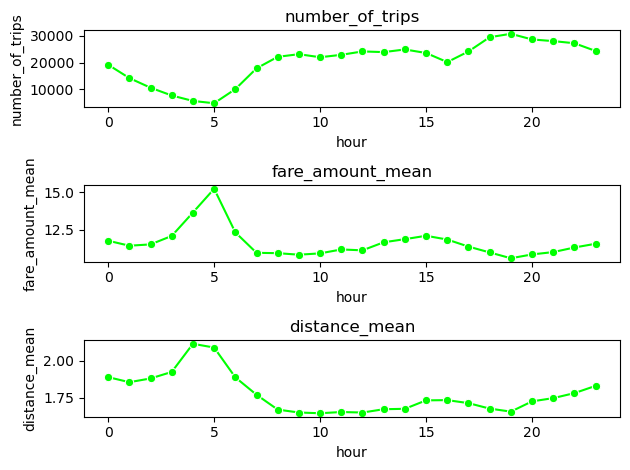

In [118]:
fig, axes= plt.subplots(nrows=3, ncols= 1)
plot_cols = ['number_of_trips','fare_amount_mean','distance_mean']
for i, ax in enumerate(axes):
    sns.lineplot(x= trips_per_hour_0['hour'], y= trips_per_hour_0[plot_cols[i]],ax=ax ,marker='o', color='lime')
    set_title_(axes= axes, i= i, column=plot_cols[i])
    set_labels_(axes= axes, i= i, label_x= 'hour', label_y= plot_cols[i])
    
plt.tight_layout()
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

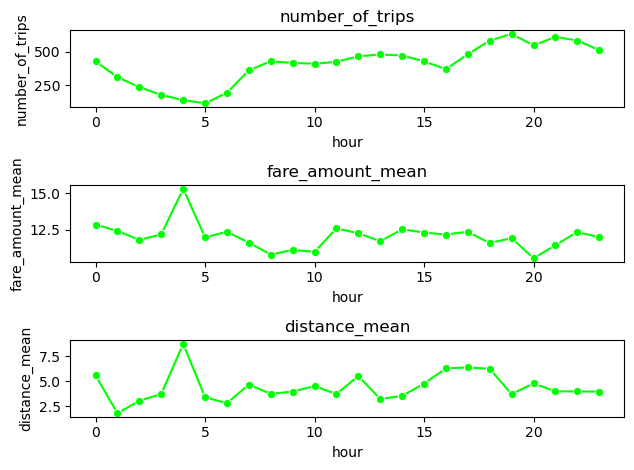

In [119]:
fig, axes= plt.subplots(nrows=3, ncols= 1)
plot_cols = ['number_of_trips','fare_amount_mean','distance_mean']
for i, ax in enumerate(axes):
    sns.lineplot(x= trips_per_hour_1['hour'], y= trips_per_hour_1[plot_cols[i]],ax=ax ,marker='o', color='lime')
    set_title_(axes= axes, i= i, column=plot_cols[i])
    set_labels_(axes= axes, i= i, label_x= 'hour', label_y= plot_cols[i])
    
plt.tight_layout()
plt.show()

In [122]:
data_nona_1.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'Car_Condition_coded', 'cluster',
       'cluster_drop'],
      dtype='object')

In [123]:
trips_per_month_0 = data_nona_0.groupby('month').agg({
        'month' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_month_0.columns = ['month','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']
trips_per_month_1 = data_nona_1.groupby('month').agg({
        'month' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_month_1.columns = ['month','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

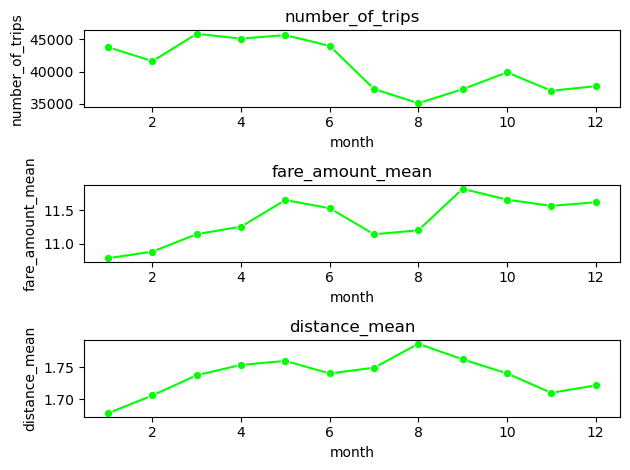

In [124]:
fig, axes= plt.subplots(nrows=3, ncols= 1)
plot_cols = ['number_of_trips','fare_amount_mean','distance_mean']
for i, ax in enumerate(axes):
    sns.lineplot(x= trips_per_month_0['month'], y= trips_per_month_0[plot_cols[i]],ax=ax ,marker='o', color='lime')
    set_title_(axes= axes, i= i, column=plot_cols[i])
    set_labels_(axes= axes, i= i, label_x= 'month', label_y= plot_cols[i])
    
plt.tight_layout()
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

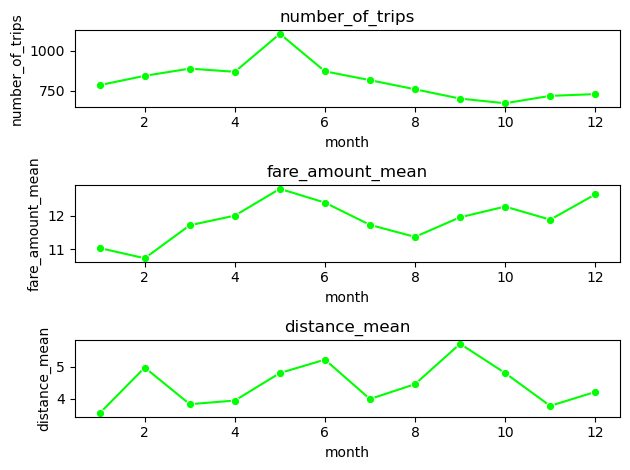

In [125]:
fig, axes= plt.subplots(nrows=3, ncols= 1)
plot_cols = ['number_of_trips','fare_amount_mean','distance_mean']
for i, ax in enumerate(axes):
    sns.lineplot(x= trips_per_month_1['month'], y= trips_per_month_1[plot_cols[i]],ax=ax ,marker='o', color='lime')
    set_title_(axes= axes, i= i, column=plot_cols[i])
    set_labels_(axes= axes, i= i, label_x= 'month', label_y= plot_cols[i])
    
plt.tight_layout()
plt.show()

In [126]:
trips_per_year_0 = data_nona_0.groupby('year').agg({
        'year' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_year_0.columns = ['year','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']
trips_per_year_1 = data_nona_1.groupby('year').agg({
        'year' : 'count',
        'fare_amount':['mean','std'],
        'passenger_count':['mean','std'],
        'distance':['mean','std'],
        'jfk_dist':['mean','std']
    }).reset_index()
trips_per_year_1.columns = ['year','number_of_trips' ,
                          'fare_amount_mean', 'fare_amount_std', 
                          'passenger_count_mean', 'passenger_count_std', 
                          'distance_mean', 'distance_std', 
                          'jfk_dist_mean', 'jfk_dist_std']


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

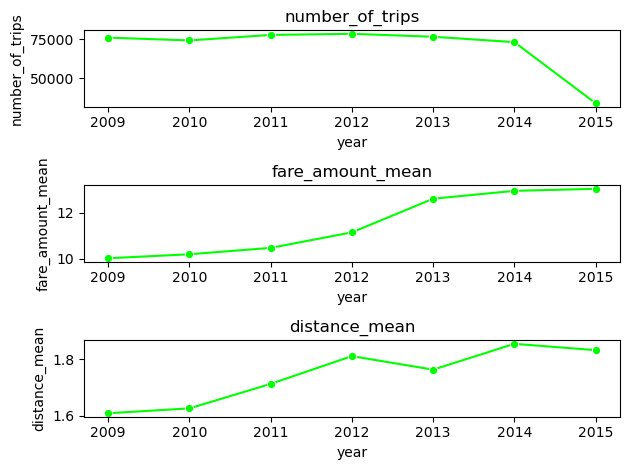

In [127]:
fig, axes= plt.subplots(nrows=3, ncols= 1)
plot_cols = ['number_of_trips','fare_amount_mean','distance_mean']
for i, ax in enumerate(axes):
    sns.lineplot(x= trips_per_year_0['year'], y= trips_per_year_0[plot_cols[i]],ax=ax ,marker='o', color='lime')
    set_title_(axes= axes, i= i, column=plot_cols[i])
    set_labels_(axes= axes, i= i, label_x= 'year', label_y= plot_cols[i])
    
plt.tight_layout()
plt.show()

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

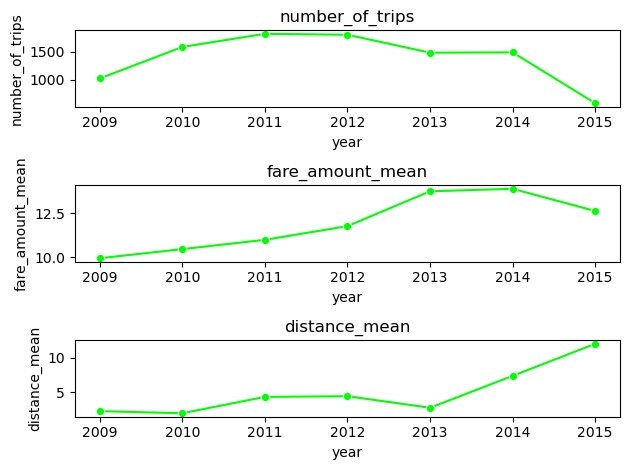

In [128]:
fig, axes= plt.subplots(nrows=3, ncols= 1)
plot_cols = ['number_of_trips','fare_amount_mean','distance_mean']
for i, ax in enumerate(axes):
    sns.lineplot(x= trips_per_year_1['year'], y= trips_per_year_1[plot_cols[i]],ax=ax ,marker='o', color='lime')
    set_title_(axes= axes, i= i, column=plot_cols[i])
    set_labels_(axes= axes, i= i, label_x= 'year', label_y= plot_cols[i])
    
plt.tight_layout()
plt.show()